## Introduction

Sparrow is a library designed to incorporate a wide variety of sequence analysis. It is aimed at taking advantage of python's syntax and sequence feature prediction.

In [1]:
import numpy as np
from matplotlib import pyplot as plt


# This is the main object that creates a "Protein" from an amino acid sequence
from sparrow import Protein

## The Basics

This section will cover the basic analysis that sparrow can do on amino acid sequences.

Topics will include: how to get a protein object, chemically displaying a sequence, sequence fraction analysis, molecular weight, custom class sequence fraction

Let's get started by creating a protein object for the amino acid sequence of BARD1

In [2]:
# BARD1 copy and pasted from uniprot (Q99728)
BARD1_sequence = "MPDNRQPRNRQPRIRSGNEPRSAPAMEPDGRGAWAHSRAALDRLEKLLRCSRCTNILREPVCLGGCEHIFCSNCVSDCIGTGCPVCYTPAWIQDLKINRQLDSMIQLCSKLRNLLHDNELSDLKEDKPRKSLFNDAGNKKNSIKMWFSPRSKKVRYVVSKASVQTQPAIKKDASAQQDSYEFVSPSPPADVSERAKKASARSGKKQKKKTLAEINQKWNLEAEKEDGEFDSKEESKQKLVSFCSQPSVISSPQINGEIDLLASGSLTESECFGSLTEVSLPLAEQIESPDTKSRNEVVTPEKVCKNYLTSKKSLPLENNGKRGHHNRLSSPISKRCRTSILSTSGDFVKQTVPSENIPLPECSSPPSCKRKVGGTSGRKNSNMSDEFISLSPGTPPSTLSSSSYRRVMSSPSAMKLLPNMAVKRNHRGETLLHIASIKGDIPSVEYLLQNGSDPNVKDHAGWTPLHEACNHGHLKVVELLLQHKALVNTTGYQNDSPLHDAAKNGHVDIVKLLLSYGASRNAVNIFGLRPVDYTDDESMKSLLLLPEKNESSSASHCSVMNTGQRRDGPLVLIGSGLSSEQQKMLSELAVILKAKKYTEFDSTVTHVVVPGDAVQSTLKCMLGILNGCWILKFEWVKACLRRKVCEQEEKYEIPEGPRRSRLNREQLLPKLFDGCYFYLWGTFKHHPKDNLIKLVTAGGGQILSRKPKPDSDVTQTINTVAYHARPDSDQRFCTQYIIYEDLCNYHPERVRQGKVWKAPSSWFIDCVMSFELLPLDS"

BARD1_Protein = Protein(BARD1_sequence)

You can display the amino acid sequence in terms of chemitries as colors

In [3]:
# This code will show the sequence. You do not need all the specified flags it works without passing parameters
BARD1_Protein.show_sequence(blocksize=10,newline=50, fontsize=14, font_family="Courier", 
                            bold_positions=[], bold_residues=[], opaque_positions=[])

Let's see how we can highlight or bold sequence positions

In [4]:
bold_pos = [1,2,3,5,] # makes the first 5 sequence positions bold
bold_res = ['H', 'K', 'R'] # Makes Histidine, lysine, and arginine bolded
opaque_pos = [11,12,13,14,15] # makes the region right after the first block of 10 greyed out

BARD1_Protein.show_sequence(blocksize=10,newline=50, fontsize=14, font_family="Courier", 
                            bold_positions=bold_pos, bold_residues=bold_res, opaque_positions=opaque_pos)

Now lets cover some of the basic sequence analysis we can do.

In [5]:
# express to the user what is about to occur
print(f"BARD1 has a variety of properties:")

# lets get the fraction of different amino acids in the sequence
bard1_aa_frac = BARD1_Protein.amino_acid_fractions # this is considered a property and so you do not use () as there are no parameters
print(f"\tAmino Acid Fractions (as a dictionary):")
for key in bard1_aa_frac.keys():
    frac = bard1_aa_frac[key]
    print(f"\t   {key} : {frac:.2f}")

# lets get the molecular weight of bard1
bard1_mw = BARD1_Protein.molecular_weight # this is considered a property and so you do not use () as there are no parameters
print(f"\tMolecular weight: {bard1_mw:.2f}")

# lets get the fraction of residues in the sequence that are charged (FCR) - D,E,K,R
bard1_fcr = BARD1_Protein.FCR # this is considered a property and so you do not use () as there are no parameters
print(f"\tFCR: {bard1_fcr:.2f}")

#lets split this into positive and negative charge
bard1_pos_frac = BARD1_Protein.fraction_positive # positive fraction 
bard1_neg_frac = BARD1_Protein.fraction_negative # Negative fraction
print(f"\t   Positive Fraction: {bard1_pos_frac:.2f}")
print(f"\t   Negative Fraction: {bard1_neg_frac:.2f}")

# lets determine the fraction of aromatic, aliphatic, polar, proline
bard1_aro_frac = BARD1_Protein.fraction_aromatic # Tyr, Phe, Trp
bard1_ali_frac = BARD1_Protein.fraction_aliphatic # A, L, I, M, V
bard1_polar_frac = BARD1_Protein.fraction_polar # Gly, Ser, Thr, Asn, His
bard1_proline_frac = BARD1_Protein.fraction_proline # only proline (its special and asking questions is common enough to warrent its own)
print(f"\tFraction aromatic: {bard1_aro_frac:.2f}")
print(f"\tFraction aliphatic: {bard1_ali_frac:.2f}")
print(f"\tFraction Polar: {bard1_polar_frac:.2f}")
print(f"\tFraction proline: {bard1_proline_frac:.2f}")



BARD1 has a variety of properties:
	Amino Acid Fractions (as a dictionary):
	   A : 0.05
	   C : 0.03
	   D : 0.05
	   E : 0.06
	   F : 0.02
	   G : 0.06
	   H : 0.03
	   I : 0.04
	   K : 0.08
	   L : 0.10
	   M : 0.02
	   N : 0.05
	   P : 0.06
	   Q : 0.04
	   R : 0.06
	   S : 0.11
	   T : 0.04
	   V : 0.06
	   W : 0.01
	   Y : 0.02
	Molecular weight: 86586.00
	FCR: 0.25
	   Positive Fraction: 0.14
	   Negative Fraction: 0.11
	Fraction aromatic: 0.06
	Fraction aliphatic: 0.27
	Fraction Polar: 0.32
	Fraction proline: 0.06


We can also compute out any custom classes amino acid fractions that we define. Lets say we have a list of amino acids that all belong in some case for an analysis purpose (say A, C, H). We can compute the fraction of the sequence that these amino acids make up in a simple way without needing to worry about summing individiual numbers

In [6]:
# lets pretend for a second that A, C, H are import for the moment and compute the fraction of a new class were these are all combined
aa_in_group = ['A', 'C', 'H']
bard1_custom_frac = BARD1_Protein.compute_residue_fractions(aa_in_group) # sum of fracs for aa_in_group

# lets display what the combined fraction of these are
group_str = ", ".join(aa_in_group)
print(f"The new class fraction ({group_str}): {bard1_custom_frac:.2f}")

The new class fraction (A, C, H): 0.11


Lastly we can compute the net charge per residues which is simply the postive fraction - negative fraction

In [7]:
# The net charge is in the NCPR property
net_charge_per_residue = BARD1_Protein.NCPR

# Lets print the net charge per residue for bard1
print(f"BARD1's net charge per residue (NCPR): {net_charge_per_residue}")

BARD1's net charge per residue (NCPR): 0.02702702702702703


## Patterning

Lets now move on to amino acid patterning based analysis in sparrow.

Kappa is a classic parameter that gets at how clustered a sequence for some specific residue class. 0 is evenly disperse while 1 is entirely clustered together

In [8]:
# lets make a sequence that has a very disperse alternating sequence
low_kappa_Protein = Protein("DKDKDKDKDKDKDKDKD")

# Lets make a sequence that has a very clustered sequence
high_kappa_Protein = Protein("DDDDDDDDDKKKKKKKKK")

In [9]:
# lets print them to show their chemical sequence composition
print(f"Low Kappa Sequence")
low_kappa_Protein.show_sequence()

Low Kappa Sequence


In [10]:
print(f"High Kappa Sequence")
high_kappa_Protein.show_sequence()

High Kappa Sequence


In the world of IDRs Kappa has seen prominence and use as a charge spacing parameter. Basically we will compute kappa on charged species splitting up positive (KR) and negative charge (DE).

In [11]:
# lets compute the kappa value for the charged species
low_kap = low_kappa_Protein.kappa
high_kap = high_kappa_Protein.kappa

# lets print out the result
print(f"The low kappa sequence had: kappa = {low_kap:.2f}")
print(f"The high kappa sequence had: kappa = {high_kap:.2f}")

The low kappa sequence had: kappa = 0.01
The high kappa sequence had: kappa = 1.00


We can also calculate our own version of this spacing parameter (kappa) on self defined groups (rather than KR for positive and DE for negative)

In [12]:
highart_kappa_seq = "ASAASAAASAAPPPSPPSPPP"
highart_kappa_Protein = Protein(highart_kappa_seq)

Lets display the artificial sequence

In [13]:
print(f"Artificial Sequence with high kappa on Group 1 = A and Group 2 = P")
highart_kappa_Protein.show_sequence()

Artificial Sequence with high kappa on Group 1 = A and Group 2 = P


Notice how there are no charged amino acids in this sequence so the kappa value is kinda meaningless. As such it returns -1.

In [14]:
print(f"Articiail Sequence Charged kappa value = {highart_kappa_Protein.kappa:.2f}")

Articiail Sequence Charged kappa value = -1.00


In [15]:
# lets define our two groups
group1 = ['A'] # could in priniciple be any amino acids you wish
group2 = ['P']

# lets compute the self defined spacing parameter between A and P
self_def_kappa = highart_kappa_Protein.compute_kappa_x(group1=group1, group2=group2, window_size=6, flatten=True)

print(f"Our custom grouped kappa value is {self_def_kappa:.2f}")

Our custom grouped kappa value is 0.65


Kappa is not the only patterning parameter in sparrow. The inverse weighted distance can also be computed for sequences. This parameter has some nicer properties that kappa sometimes. It does compute as a single classification versus all others. So for charge patterning we must pick one charge or another.

In [16]:
# lets compute the inverse weighted distance for positive charged species and negative
# positive
high_kap_iwd_p = high_kappa_Protein.compute_iwd_charged_weighted(charge='+')
low_kap_iwd_p = low_kappa_Protein.compute_iwd_charged_weighted(charge='+')
# negative
high_kap_iwd_n = high_kappa_Protein.compute_iwd_charged_weighted(charge='-')
low_kap_iwd_n = low_kappa_Protein.compute_iwd_charged_weighted(charge='-')

# print the custom kappa values
print(f"Inverse weighted distance:")
print(f"\tHigh Kappa Positive: {high_kap_iwd_p:.2f}")
print(f"\tHigh Kappa Negative: {high_kap_iwd_n:.2f}")
print(f"\tLow Kappa Positive: {low_kap_iwd_p:.2f}")
print(f"\tLow Kappa Negative: {low_kap_iwd_n:.2f}")

Inverse weighted distance:
	High Kappa Positive: 2.72
	High Kappa Negative: 3.12
	Low Kappa Positive: 0.00
	Low Kappa Negative: 0.00


Similarly, we can define and inverse weighted distance for our own custom class

In [17]:
# When computing a custom iwd you need a string instead of a list
new_class = 'PS' # the string that defines P, S as our class
highart_iwd = highart_kappa_Protein.compute_iwd(new_class)

# lets display the result
print(f"Artificially clusters sequence IWD for P and S: {highart_iwd:.2f}")

Artificially clusters sequence IWD for P and S: 3.58


For the IWD, you can compute a bivariate charge weighted form of it that allows for you to consider both positive and negative charge in your patterning in a bivariate manner.

In [18]:
# we do not need to specify the class we are using in the bivariate form
# it is assumed that there are two classes D, E and K, R
bivariate = high_kappa_Protein.compute_bivariate_iwd_charged_weighted() # no parameters since this function automatically considers both charge species
print(f"The bivariate IWD: {bivariate:.2f}")

The bivariate IWD: 1.68


## Disorder prediction

This is found in the predictor module of the protein object. For greater detail check out the __init__ file in this section.

We can access predictors for disordered proteins properties from within sparrow. In order to showcase some of the structural and disorder prediction capabilities of sparrows toolkit we will continur to use BARD1 as an example since it is a multi domain protein that has both disordered and structured domains.

Lets first connect this back to the previous section and hunt for low complexity domains by sequence composition.

(0.0, 1.0)

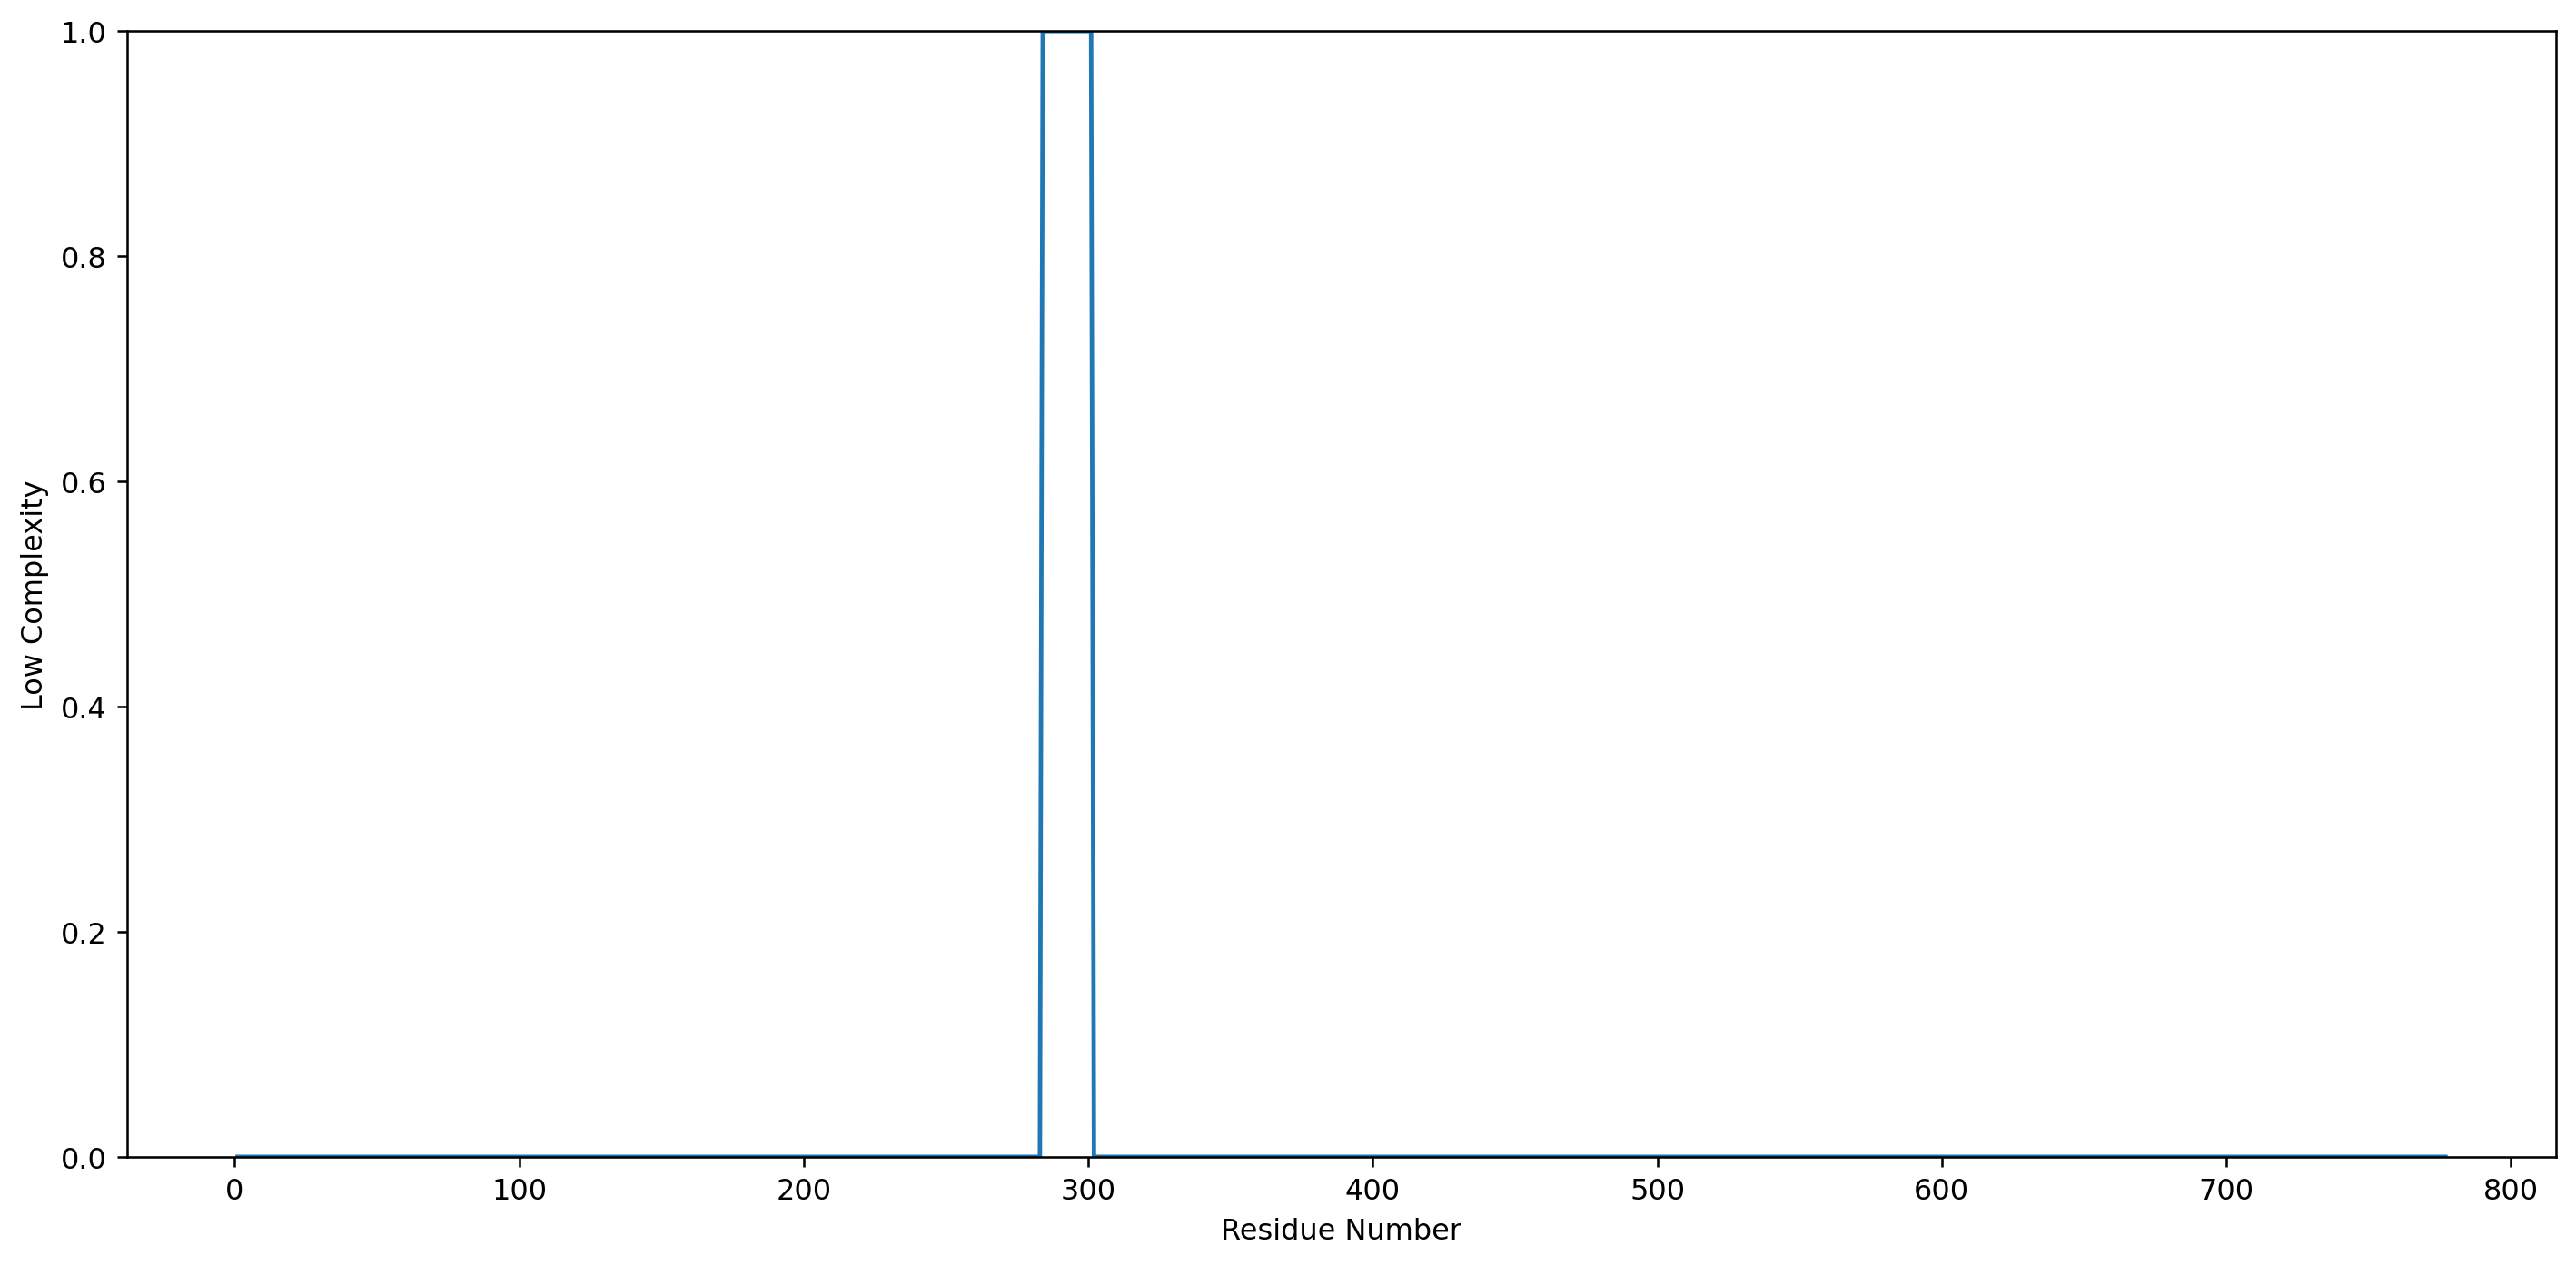

In [19]:
# In this case lets look for negative charge low complexity regions
# note this only returns either a 0 or 1 for each residue
bard1_low_complexity = BARD1_Protein.predictor.low_complexity_domains('DE', minimum_length=15,
                                                                      max_interruption=5, fractional_threshold=0.25)

plt.figure(figsize=(15,7), dpi=230)
plt.plot(np.arange(1,1 + len(bard1_low_complexity)), bard1_low_complexity)
plt.xlabel(f"Residue Number")
plt.ylabel(f"Low Complexity")
plt.ylim([0,1])

Lets start off with a sanity check for BARD1. BARD1 has multiple IDRs and folded domains lets see if we can predict those.

(0.0, 1.0)

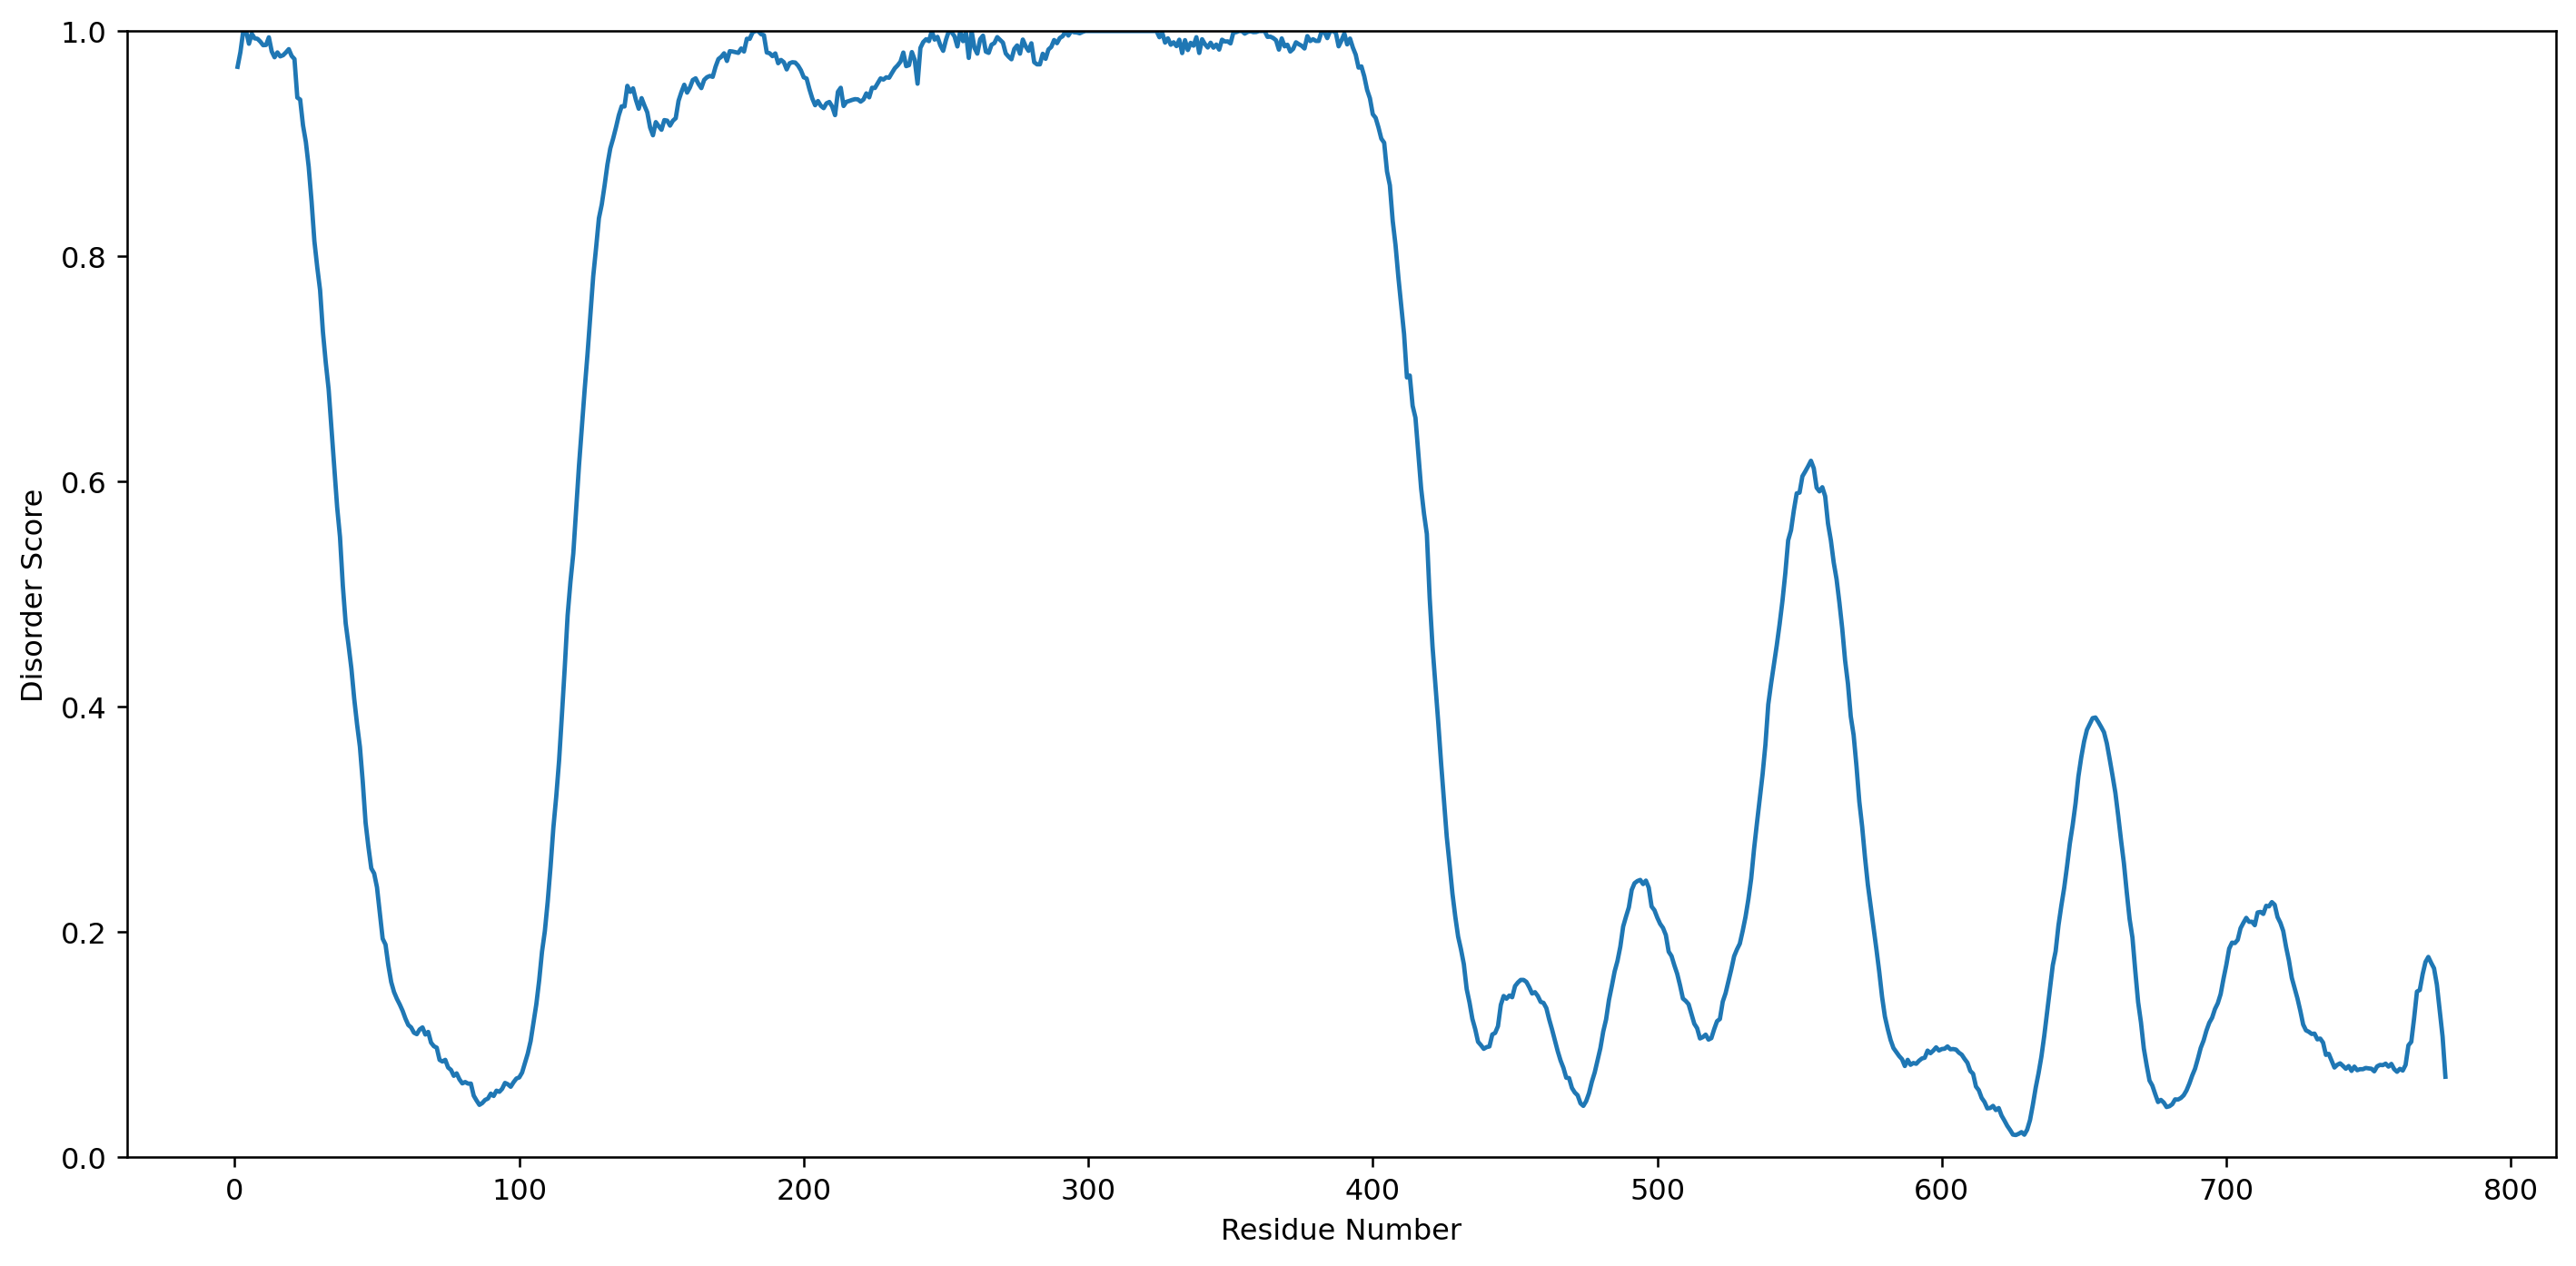

In [20]:
# lets see if any portion of BARD1 gets picked up as being transmembrane despite this not being a membrane protein
bard1_disorder = BARD1_Protein.predictor.disorder()

plt.figure(figsize=(15,7), dpi=230)
plt.plot(np.arange(1,1 + len(bard1_disorder)), bard1_disorder)
plt.xlabel(f"Residue Number")
plt.ylabel(f"Disorder Score")
plt.ylim([0,1])

Now lets see if we can find the disordered domains for this protein and plot it on the graph

BAD1 disordered domain binary with default parameters: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

(0.0, 1.0)

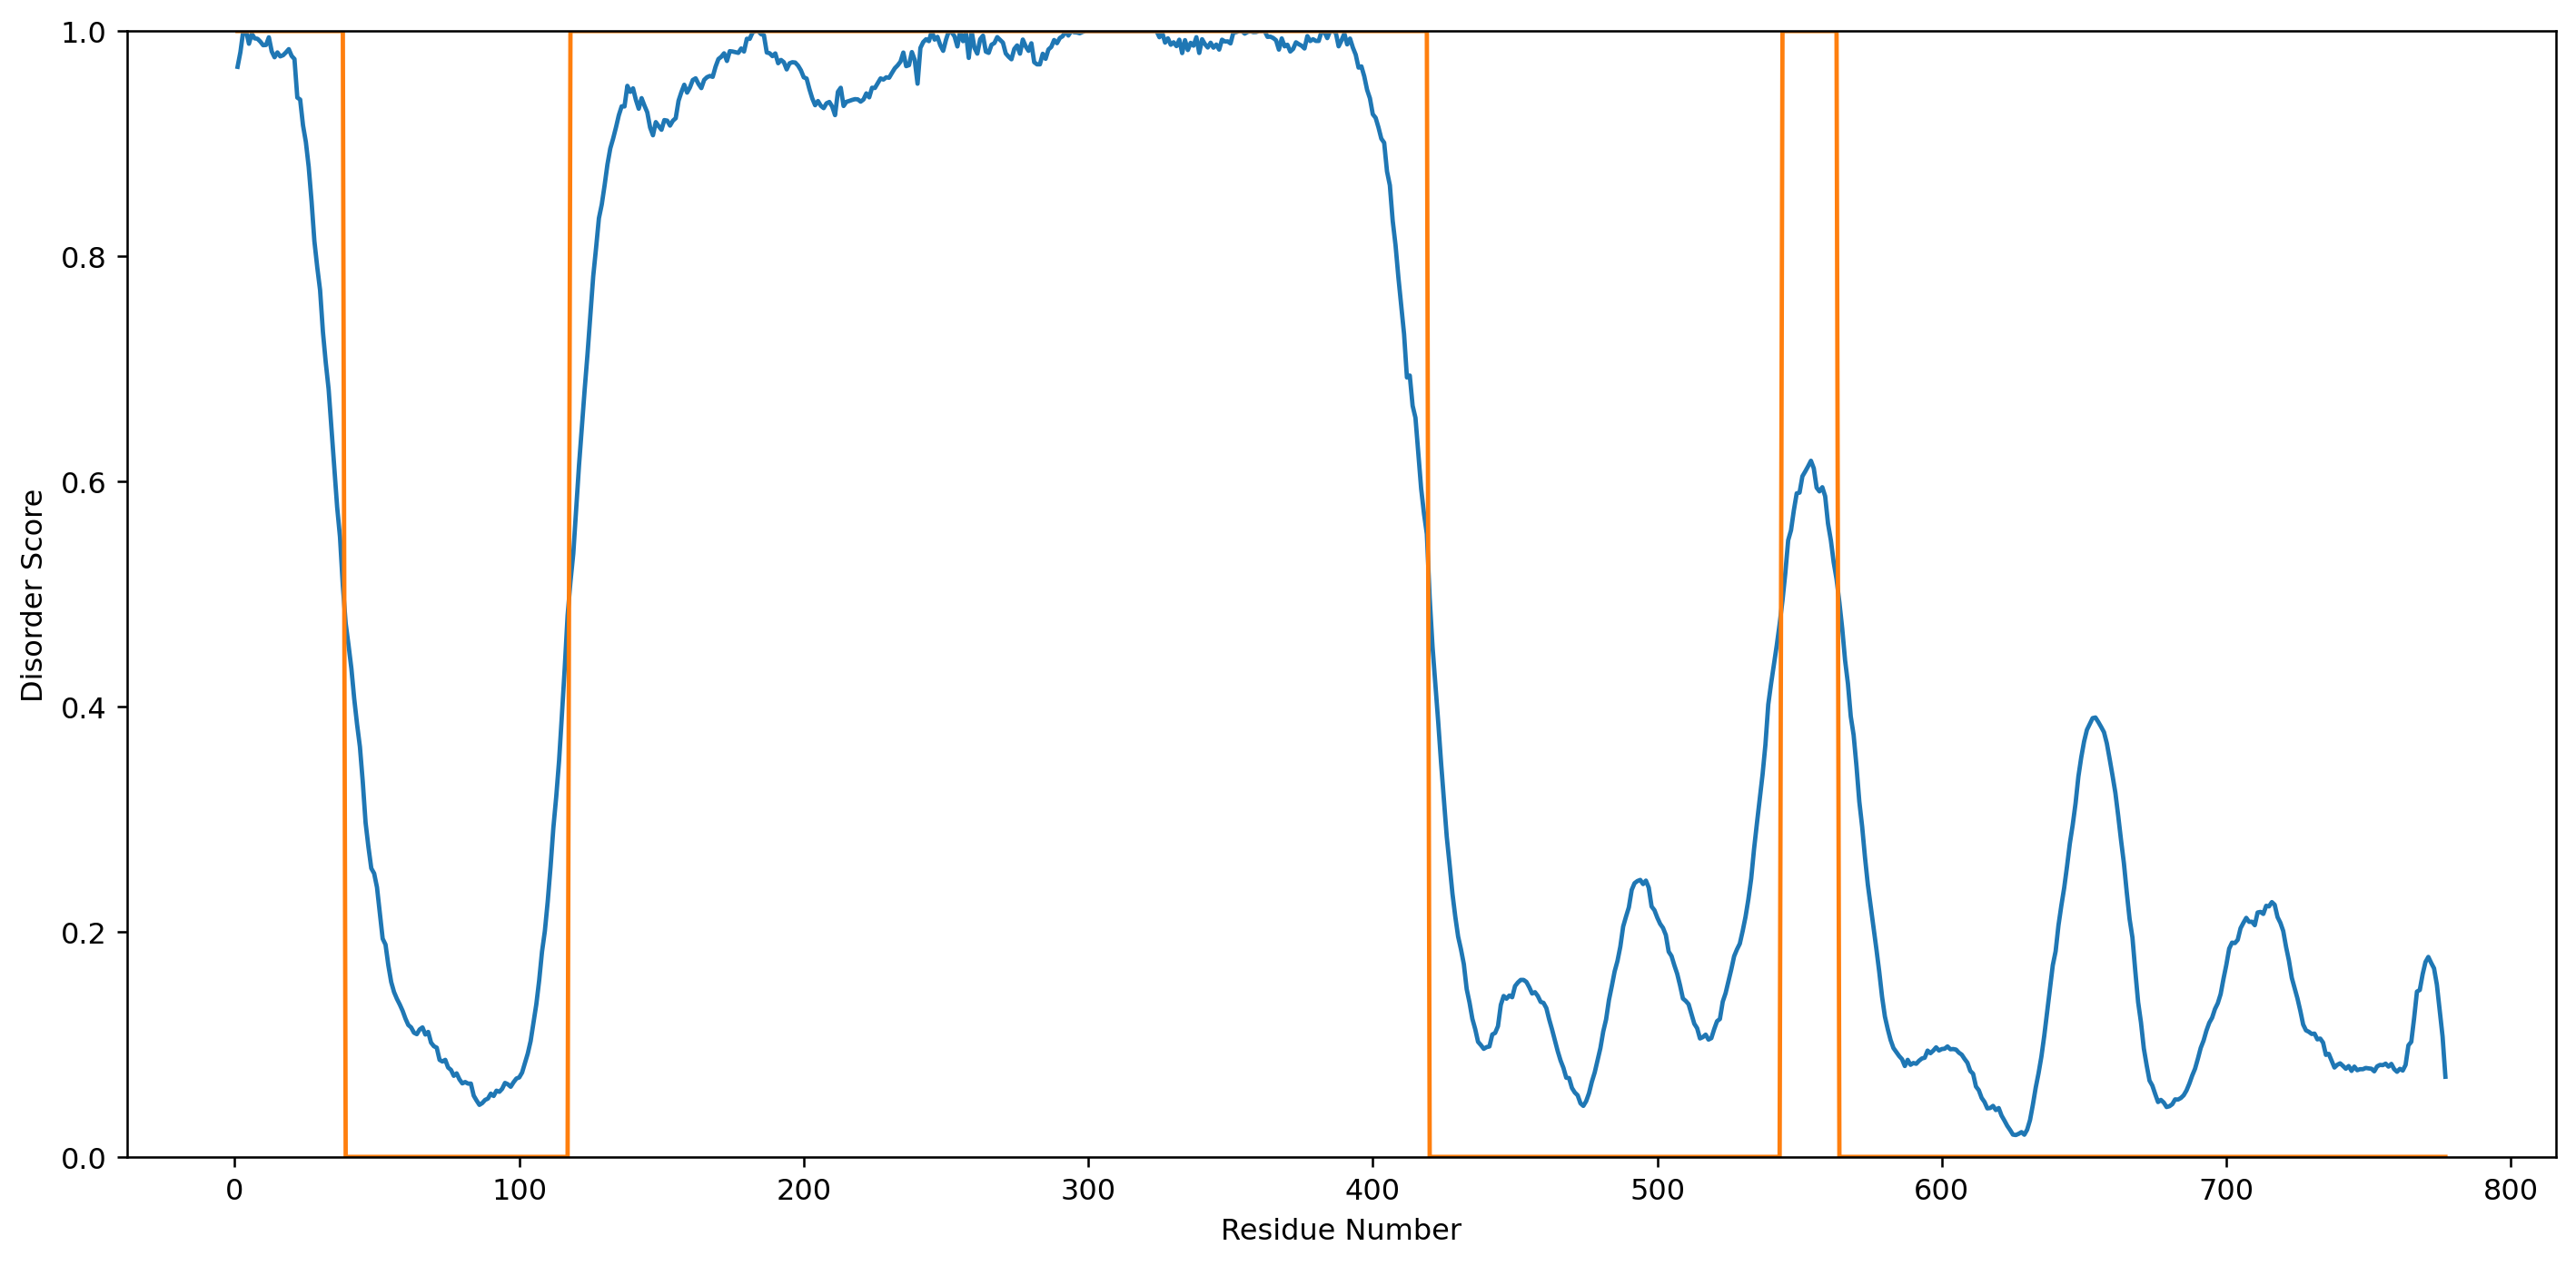

In [21]:
# compute the disordered domains
disorder_domains = BARD1_Protein.predictor.disorder_domains()

#print them out for show
print(f"BAD1 disordered domain binary with default parameters: {disorder_domains}")

plt.figure(figsize=(15,7), dpi=230)
plt.plot(np.arange(1,1 + len(bard1_disorder)), bard1_disorder)
plt.plot(np.arange(1,1 + len(bard1_disorder)), disorder_domains)
plt.xlabel(f"Residue Number")
plt.ylabel(f"Disorder Score")
plt.ylim([0,1])

We can also compute out secondary structural information (dssp) like if it is a coil, helix, and extended (aka beta-sheet like)

In [22]:
# lets predict the likelihood each residue is in a coil
coil_vals = BARD1_Protein.predictor.dssp_coil(mode='probability')

# lets predict the likelihood each residue is in a helix
helicity_vals = BARD1_Protein.predictor.dssp_helicity(mode='probability')

# lets predict the likelihood each residue is extended (aka beta sheet like)
extended_vals = BARD1_Protein.predictor.dssp_extended(mode='probability')

# lastly lets predict the plddt scores from alphafold to plot over as well
plddt_vals = BARD1_Protein.predictor.pLDDT()

Error importing GPy.
 If trying to run parrot-optimize, make sure to use `pip install idptools-parrot[optimize]`


/Users/nrazo/miniconda3/envs/for_graham1/lib/python3.11/site-packages/sparrow/predictors/dssp/dssp_predictor.py:90: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_mode

Now lets plot them on the disorder prediction

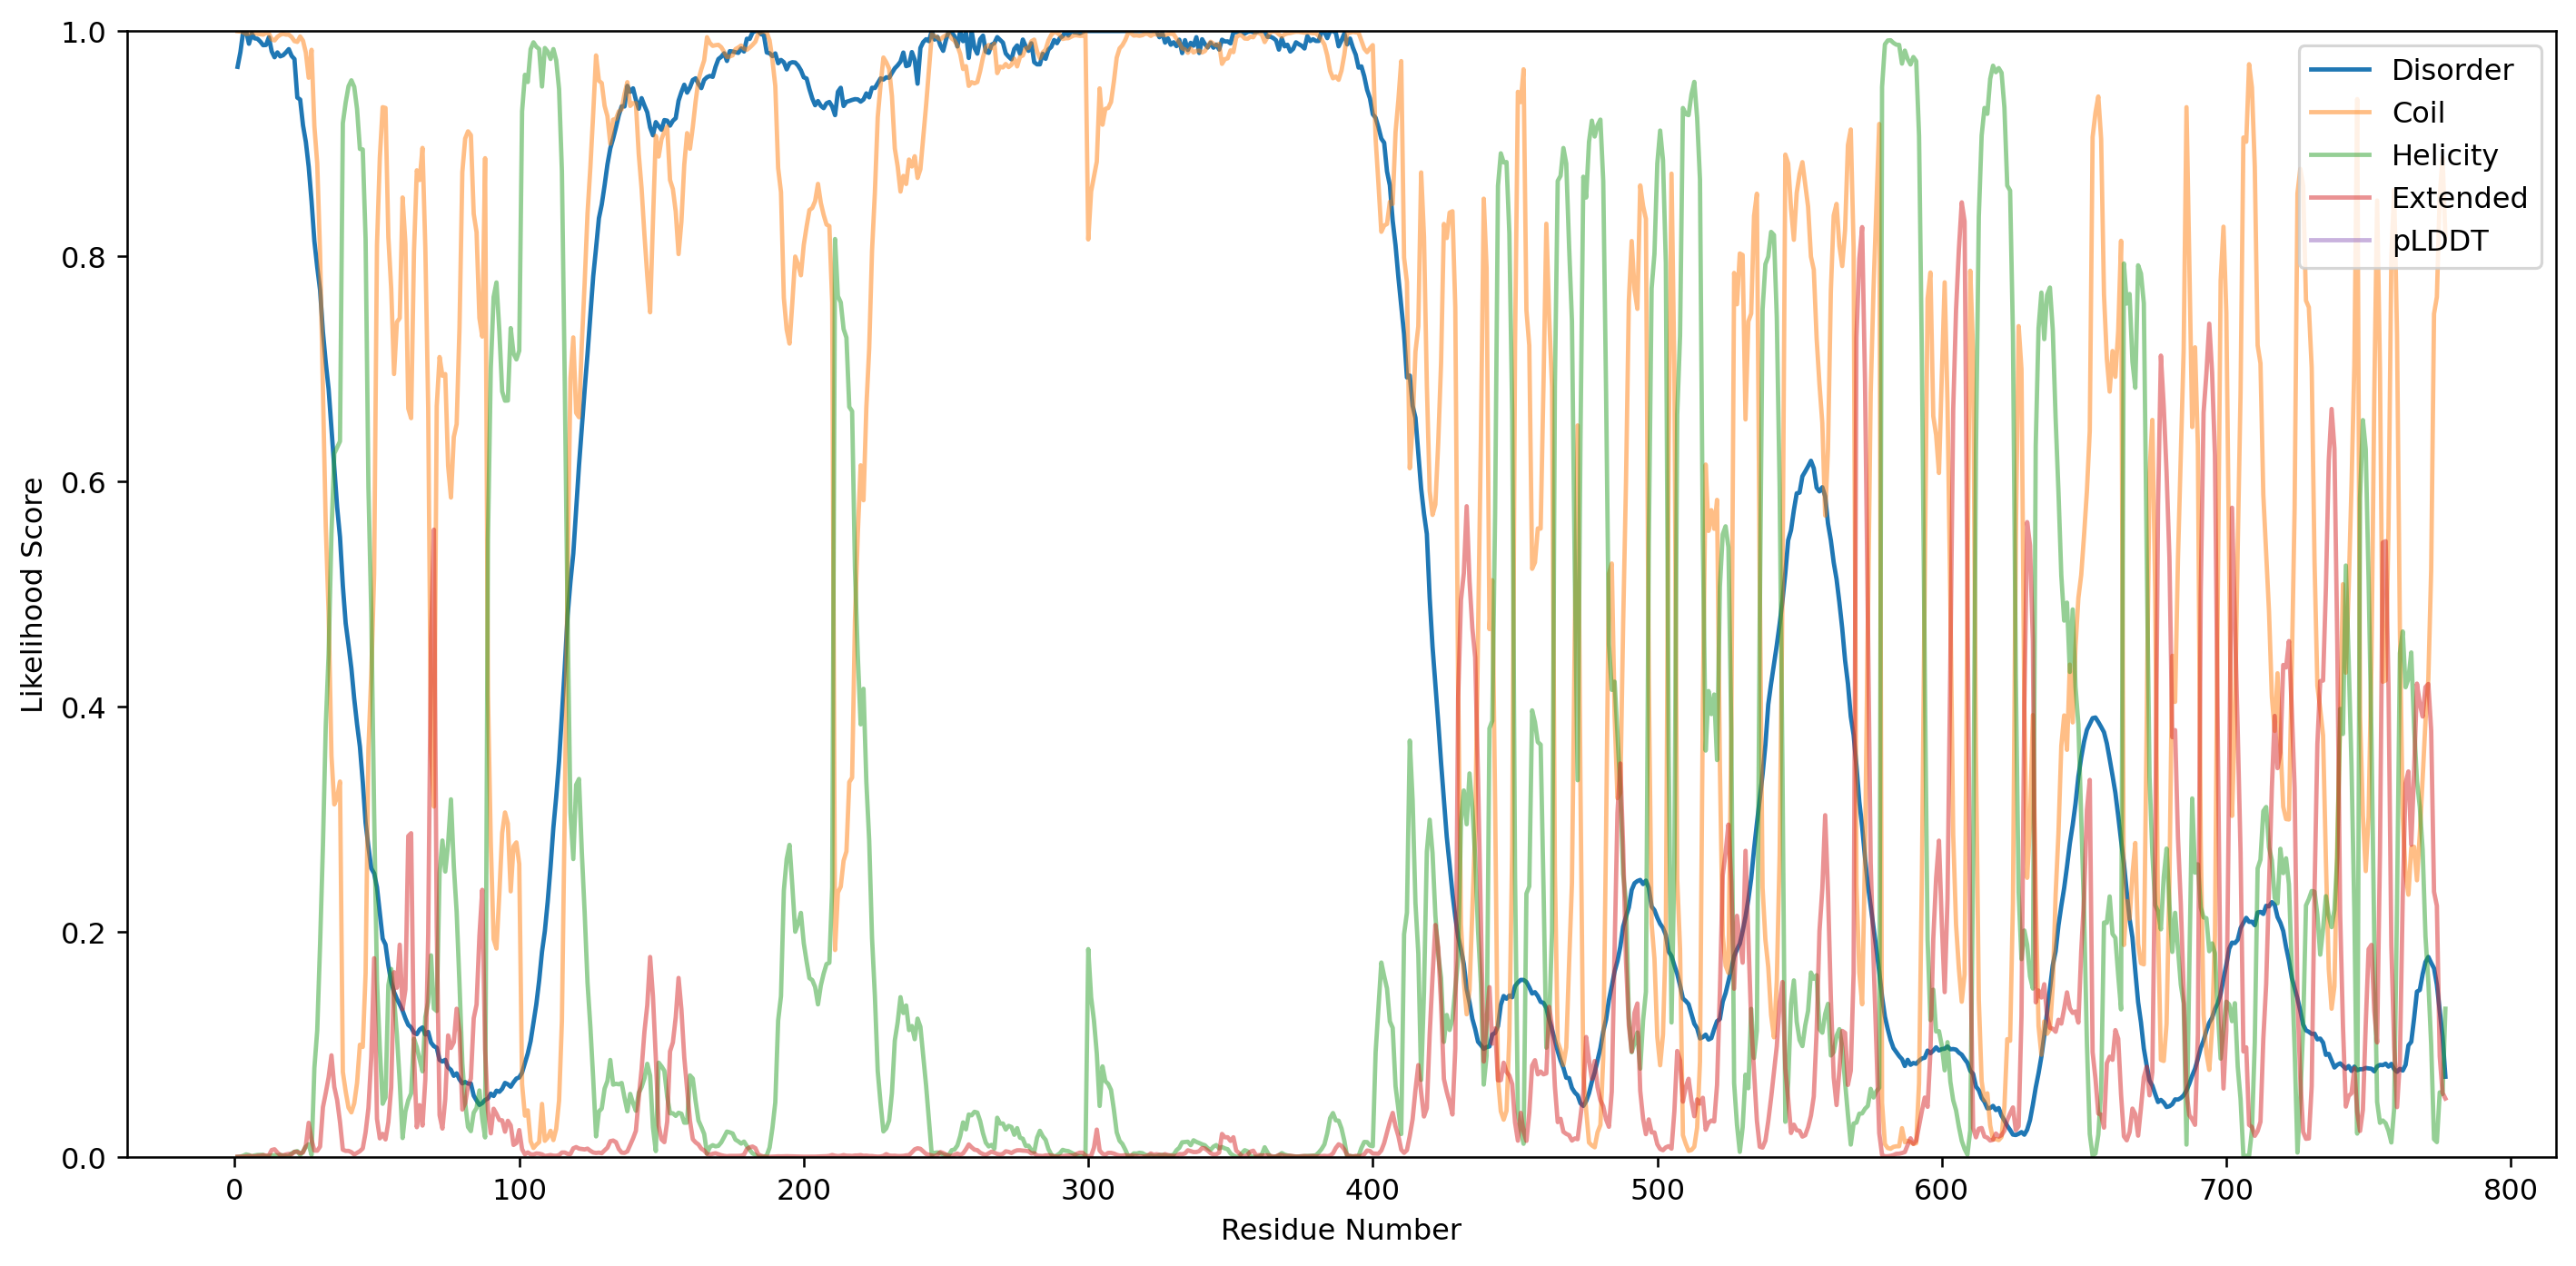

In [23]:
# plot the new predicted quantities
plt.figure(figsize=(15,7), dpi=230)
plt.plot(np.arange(1,1 + len(bard1_disorder)), bard1_disorder, label=f"Disorder", alpha=1)
plt.plot(np.arange(1,1 + len(coil_vals)), coil_vals, label=f"Coil", alpha=0.5)
plt.plot(np.arange(1,1 + len(helicity_vals)), helicity_vals, label=f"Helicity", alpha=0.5)
plt.plot(np.arange(1,1 + len(extended_vals)), extended_vals, label=f"Extended", alpha=0.5)
plt.plot(np.arange(1,1 + len(plddt_vals)), plddt_vals, label=f"pLDDT", alpha=0.5)
plt.xlabel(f"Residue Number")
plt.ylabel(f"Likelihood Score")
plt.ylim([0,1])
plt.legend()

Let's make some disorder region predictions. To do this, we will need to pull out a chunk of BARD1 that is disordered and then create a new protein object for it.

In [24]:
# I am just gonna pull out amino acids 199 to 299 since it will suffice for demonstration purposes
BARD1_chunk_Protein = Protein(BARD1_Protein.sequence[200:300])

Display the amino acids to ensure you pulled out a subsection

In [25]:
BARD1_chunk_Protein.show_sequence()

Now lets make some global dimension predictions of this chunk of sequence

In [26]:
# Lets predict the end to end distance of this bard1 chunk
bard1_ree = BARD1_chunk_Protein.predictor.end_to_end_distance()

print(f"BARD1's 199-299 residue section has a predicted Ree of: {bard1_ree:.2f}")

BARD1's 199-299 residue section has a predicted Ree of: 72.66


/Users/nrazo/miniconda3/envs/for_graham1/lib/python3.11/site-packages/sparrow/predictors/scaled_re/scaled_end_to_end_distance_predictor.py:103: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experim

If you read the documentation string there are two different modes you can use to produce global dimensions for IDRs. One of them was train on scaled data that was found to be more accurate (especially for short sequences). Lets test how different they are. Lets turn off the default parameter that tells sparrow to use the scaled network.

In [27]:
# turn off the 
bard1_ree_notscaled = BARD1_chunk_Protein.predictor.end_to_end_distance(use_scaled=False)
print(f"Predict with scaled network: {bard1_ree:.2f}")
print(f"Predict without scaled network: {bard1_ree_notscaled:.2f}")

Predict with scaled network: 72.66
Predict without scaled network: 69.42


/Users/nrazo/miniconda3/envs/for_graham1/lib/python3.11/site-packages/sparrow/predictors/e2e/end_to_end_distance_predictor.py:108: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

We can also get the global dimension from the radius of gyration

In [28]:
# we can also predict this using the scaled network or not. It is suggested to use thescaled network which is default
bard1_rg = BARD1_chunk_Protein.predictor.radius_of_gyration(use_scaled=True)

print(f"BARD1 chunk Rg: {bard1_rg:.2f}")

BARD1 chunk Rg: 31.24


/Users/nrazo/miniconda3/envs/for_graham1/lib/python3.11/site-packages/sparrow/predictors/scaled_rg/scaled_radius_of_gyration_predictor.py:103: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experime

Even if we know a global dimension of an IDR that does not tell us much about its shape. Luckily, we can also predict asphericity of an IDR.

In [29]:
# asphericity prediction does not have a scaled network
bard1_asphere = BARD1_chunk_Protein.predictor.asphericity()

# print the result
print(f"BARD1 chunk asphericity: {bard1_asphere:.2f}")

BARD1 chunk asphericity: 0.44


/Users/nrazo/miniconda3/envs/for_graham1/lib/python3.11/site-packages/sparrow/predictors/asphericity/asphericity_predictor.py:103: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

We can even come full circle and predict he prefactor and scaling exponent from polymer physics.

In [30]:
# predict the prefactor and scaling exponent
bard1_prefactor = BARD1_chunk_Protein.predictor.prefactor()
bard1_scaling_exp = BARD1_chunk_Protein.predictor.scaling_exponent()

print(f"BARD1 chunk prefactor: {bard1_prefactor}")
print(f"BARD1 chunk scaling exponent: {bard1_scaling_exp}")

BARD1 chunk prefactor: 6.196164131164551
BARD1 chunk scaling exponent: 0.5514345169067383


/Users/nrazo/miniconda3/envs/for_graham1/lib/python3.11/site-packages/sparrow/predictors/prefactor/prefactor_predictor.py:103: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  

## Motif and pattern predictions

We have a whole host of pattern predictors that are built into sparrow. From nuclear localization to phosphorylation

Lets start with nuclear localization signals

In [31]:
# lets predict nuclear import signals
pred_nuclear_import = BARD1_Protein.predictor.nuclear_import_signal()

/Users/nrazo/miniconda3/envs/for_graham1/lib/python3.11/site-packages/sparrow/predictors/nls/nuclear_import_signal_predictor.py:73: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

In [32]:
# print the data to show its format
print(f"BARD1 predicted nuclear import: {pred_nuclear_import}")

BARD1 predicted nuclear import: [0.05057, 0.1049, 0.0819, 0.09595, 0.18066, 0.12209, 0.24318, 0.25392, 0.08015, 0.16133, 0.05247, 0.1822, 0.05397, 0.02528, 0.07908, 0.17007, 0.0404, 0.04608, 0.02449, 0.10537, 0.04681, 0.06756, 0.00653, 0.00348, 0.00212, 0.00077, 0.0084, 0.01821, 0.01919, 0.00501, 0.00077, 0.00081, 8e-05, 0.00045, 0.00017, 0.00148, 0.00045, 0.00063, 0.00023, 0.00034, 0.00063, 0.00047, 0.00162, 0.00113, 0.00128, 0.00064, 0.00014, 0.00055, 0.00112, 6e-05, 3e-05, 3e-05, 0.0, 0.0, 1e-05, 4e-05, 2e-05, 0.0, 1e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2e-05, 2e-05, 1e-05, 1e-05, 0.0, 0.0, 0.0, 0.0, 1e-05, 0.0, 1e-05, 3e-05, 4e-05, 0.00145, 9e-05, 0.00022, 0.00265, 0.00032, 0.00021, 9e-05, 0.00019, 1e-05, 9e-05, 0.00036, 0.00044, 0.00041, 0.00066, 0.00113, 0.00073, 0.00389, 0.00179, 0.00367, 0.0023, 0.00341, 0.00106, 0.00011, 0.00145, 0.00162, 0.00214, 0.00121, 0.00363, 0.0036, 0.00373, 0.00419, 0.00

Lets plot this on top of disorder to show potential import signals

(0.0, 1.0)

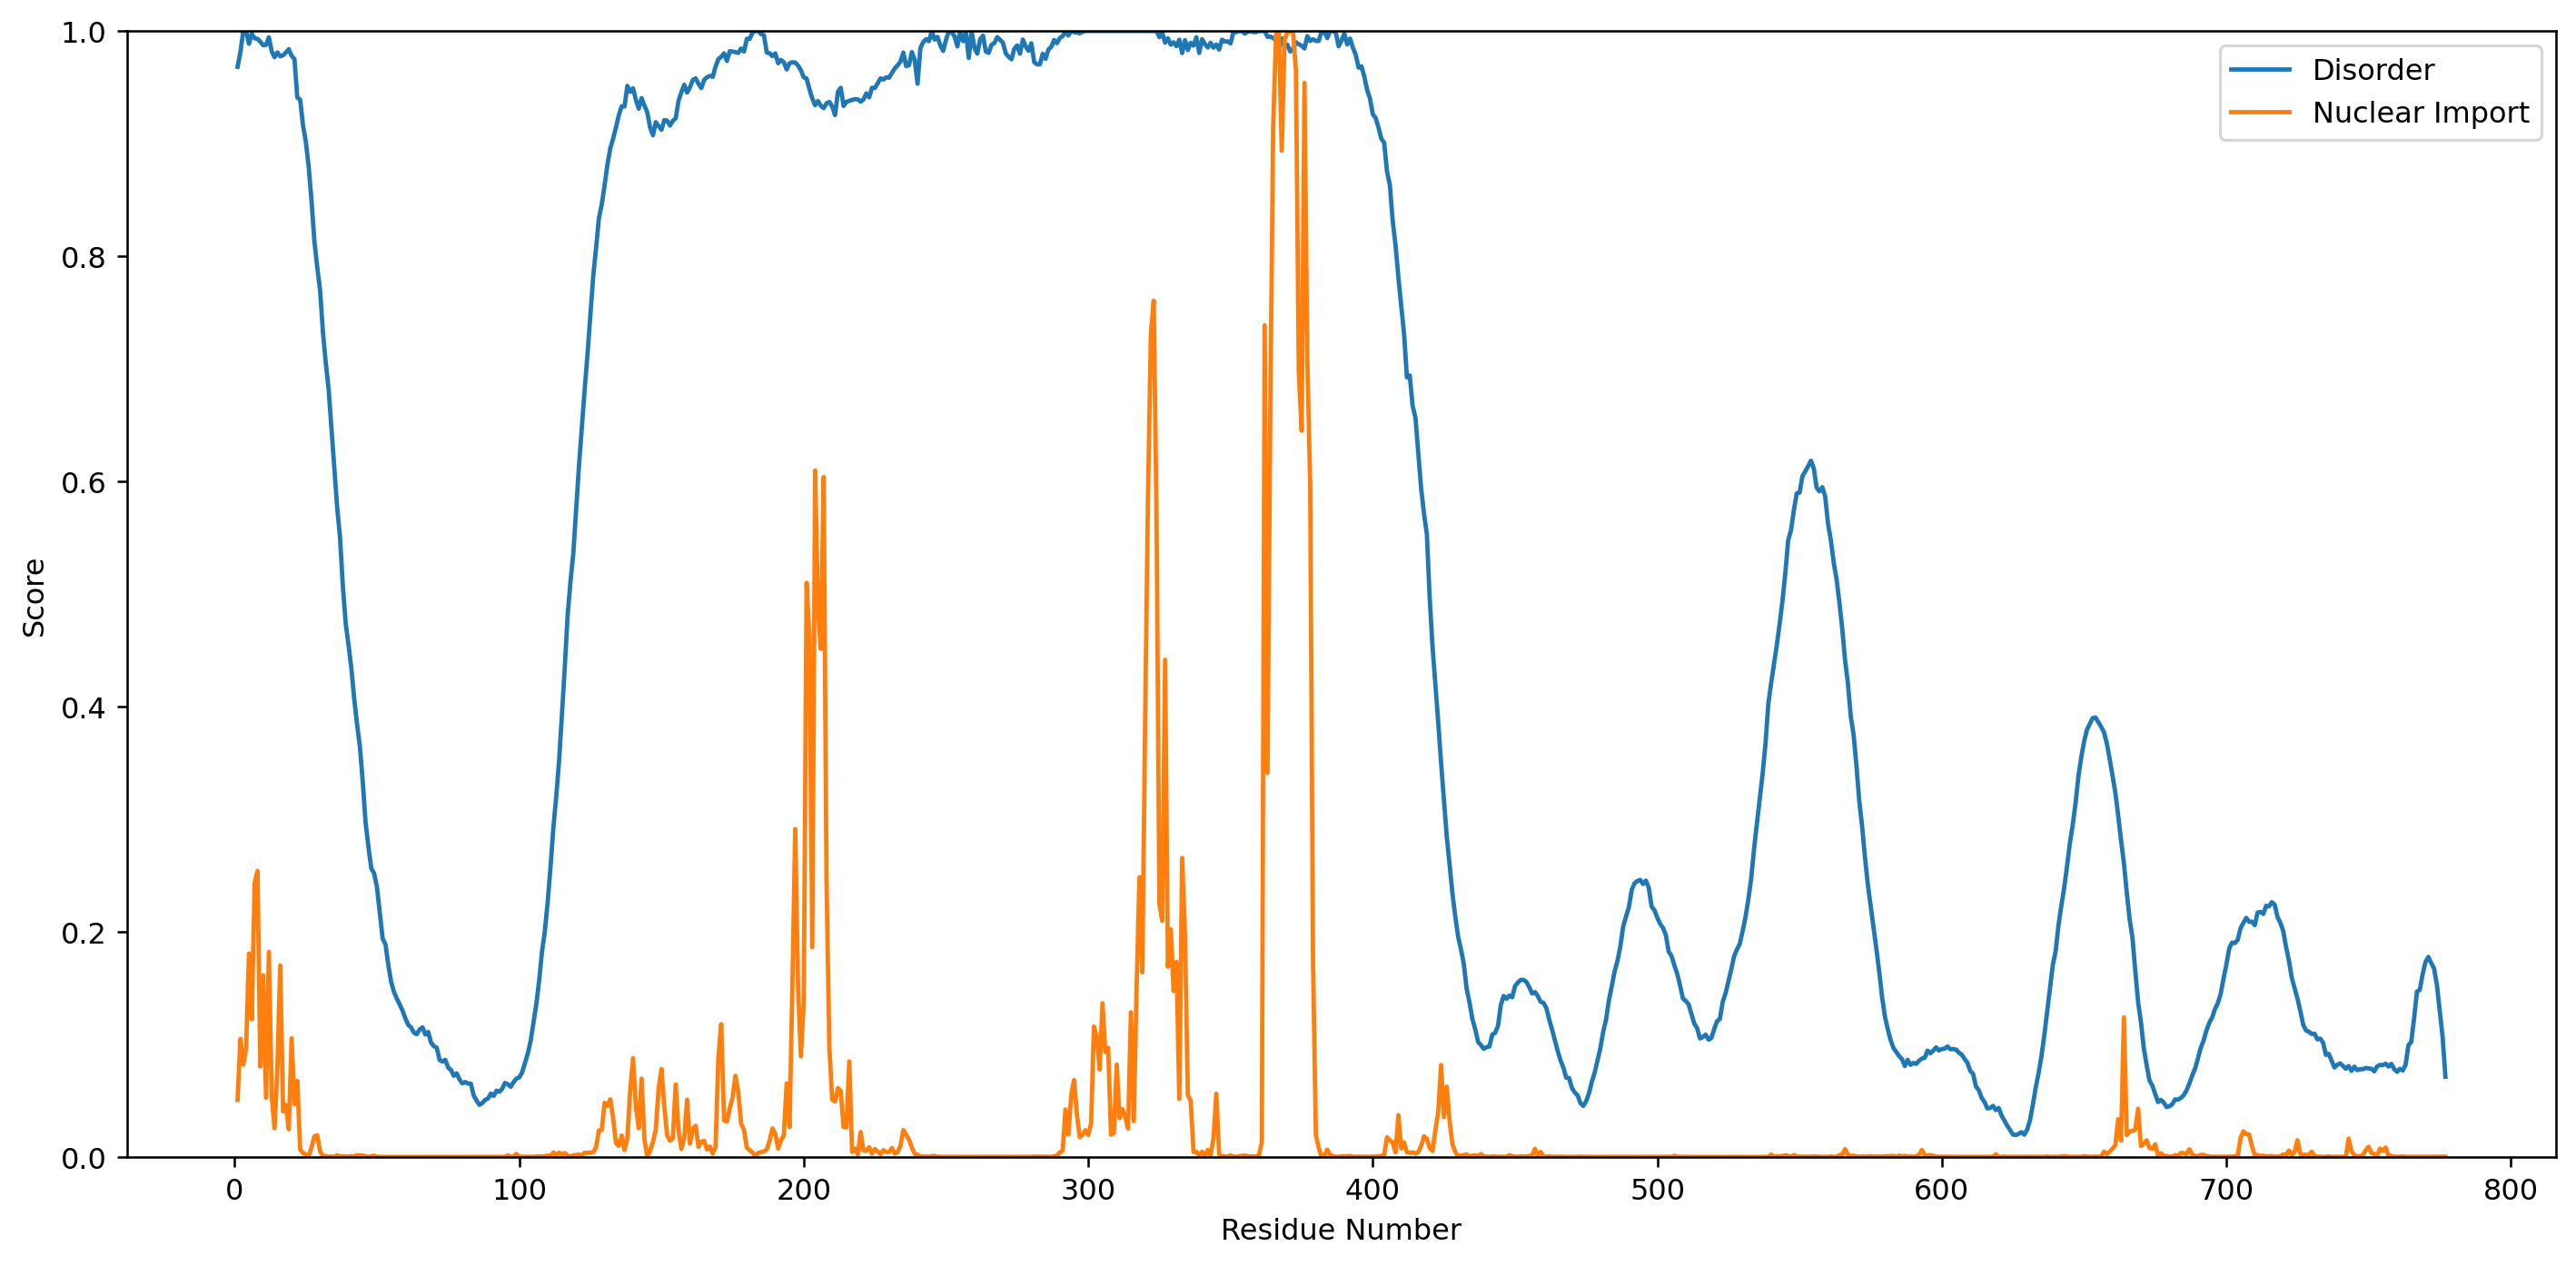

In [33]:
plt.figure(figsize=(15,7), dpi=230)
plt.plot(np.arange(1,1 + len(bard1_disorder)), bard1_disorder, label=f"Disorder")
plt.plot(np.arange(1,1 + len(pred_nuclear_import)), pred_nuclear_import, label=f"Nuclear Import")
plt.xlabel(f"Residue Number")
plt.ylabel(f"Score")
plt.legend()
plt.ylim([0,1])

We can do the same for export signals

/Users/nrazo/miniconda3/envs/for_graham1/lib/python3.11/site-packages/sparrow/predictors/nes/nuclear_export_signal_predictor.py:72: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

(0.0, 1.0)

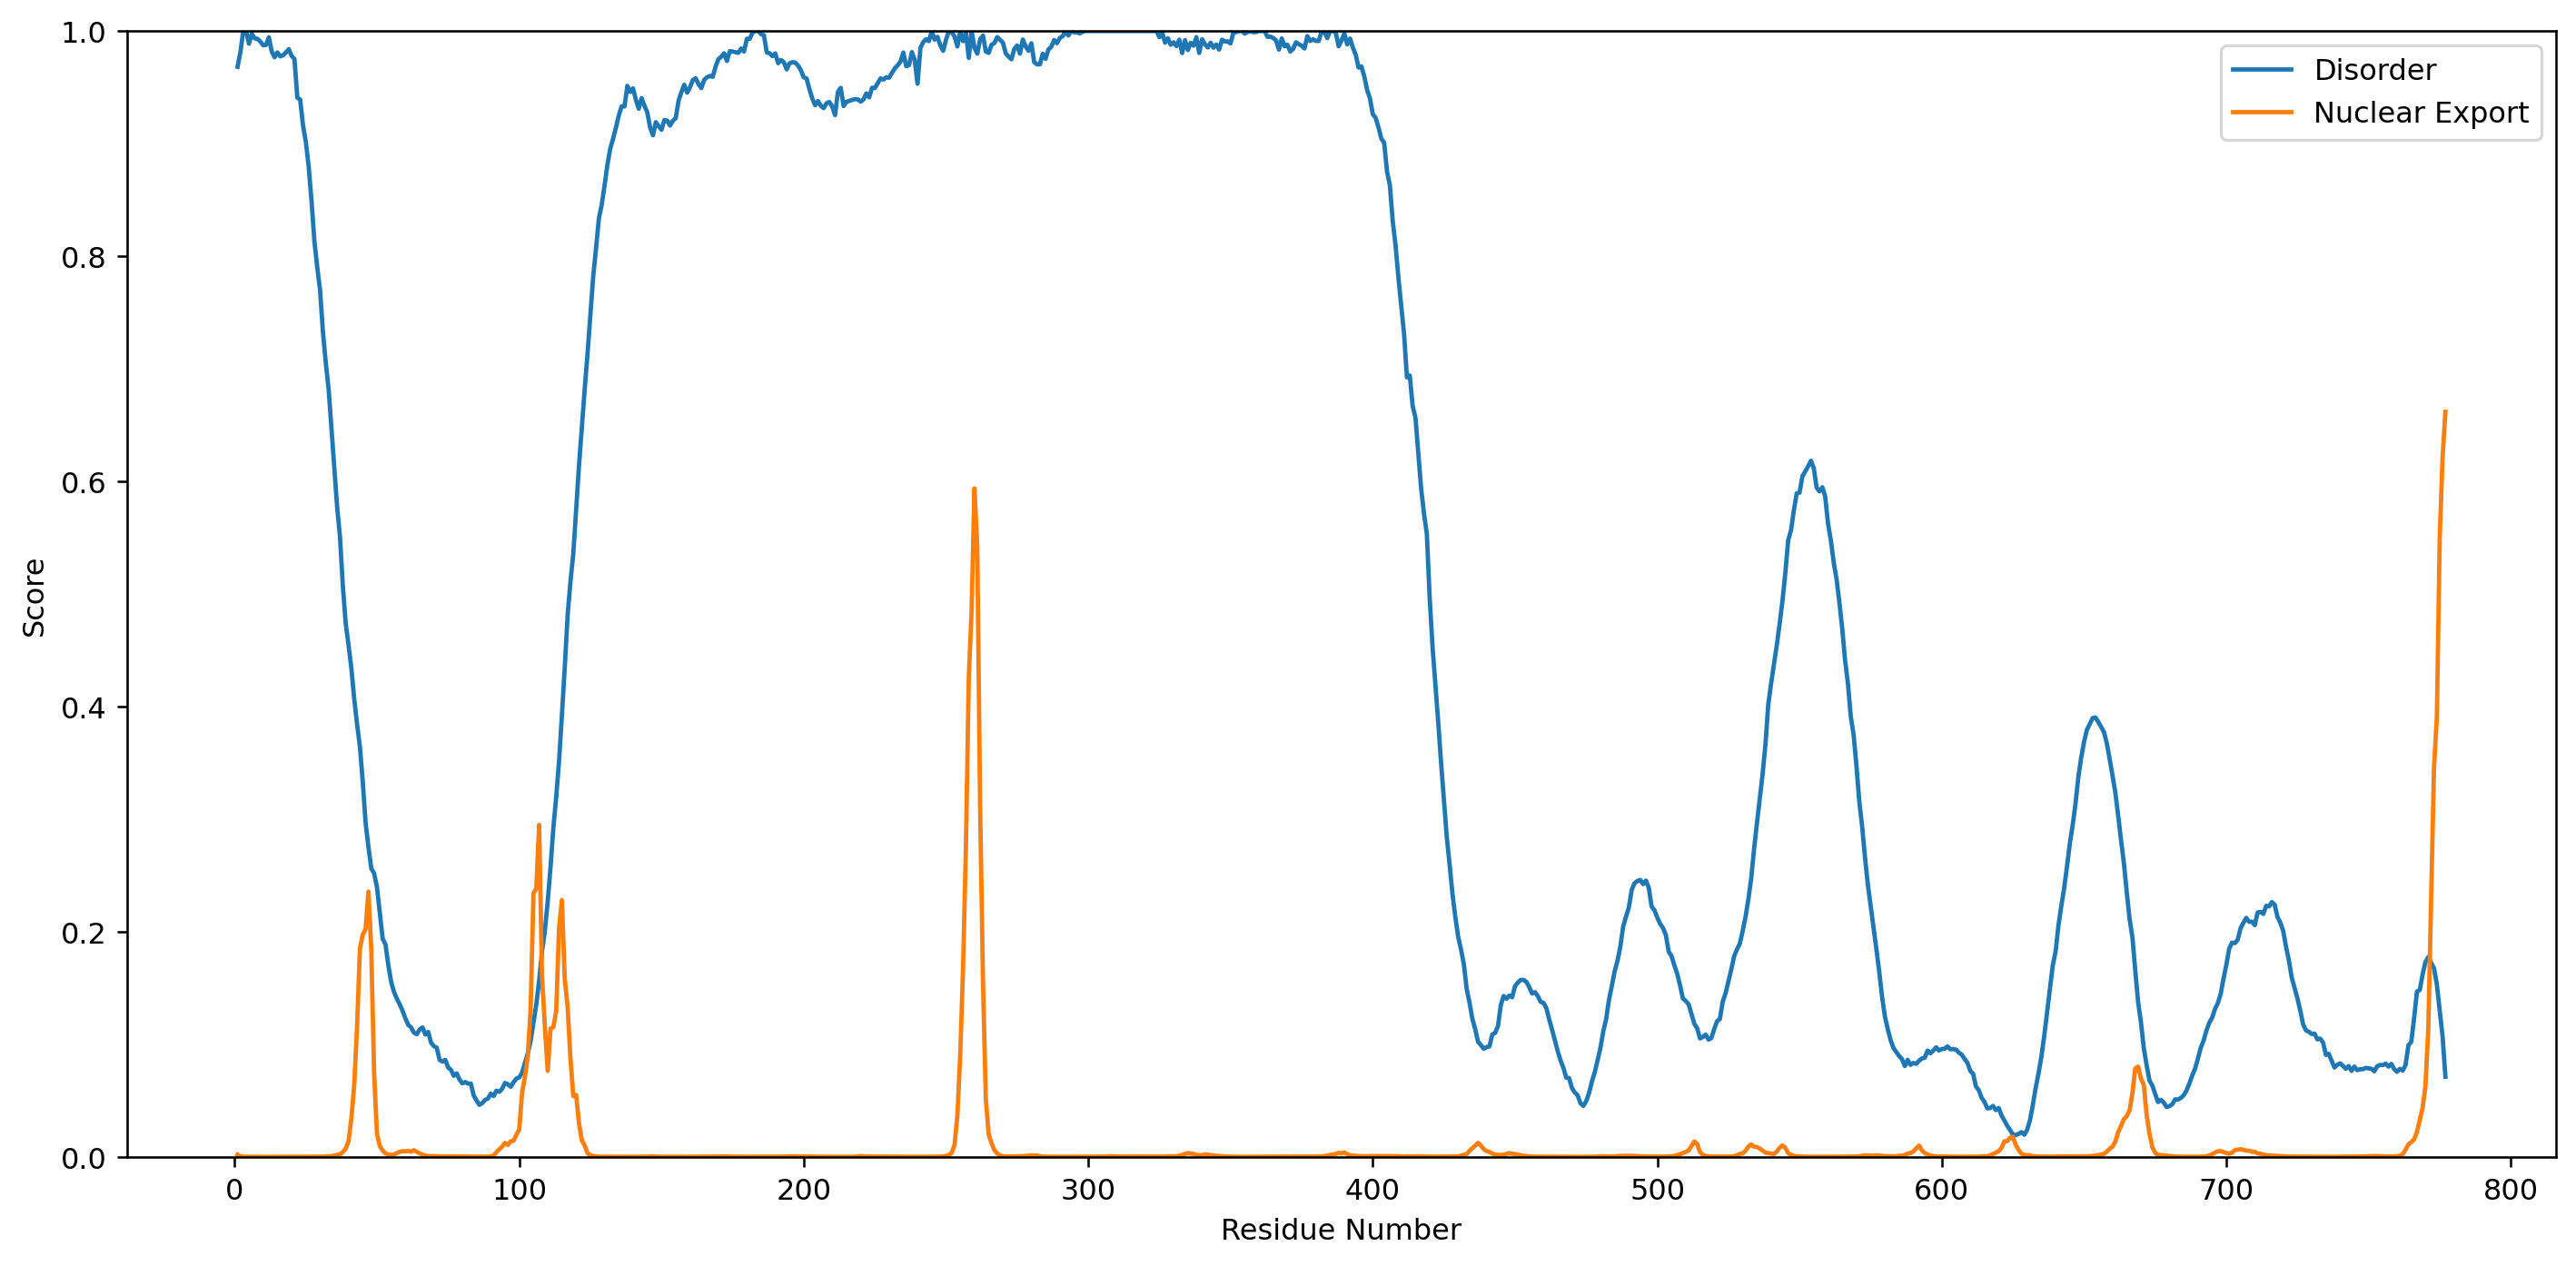

In [34]:
nuc_exp_sig = BARD1_Protein.predictor.nuclear_export_signal()

# plot the resultant prediction
plt.figure(figsize=(15,7), dpi=230)
plt.plot(np.arange(1,1 + len(bard1_disorder)), bard1_disorder, label=f"Disorder")
plt.plot(np.arange(1,1 + len(nuc_exp_sig)), nuc_exp_sig, label=f"Nuclear Export")
plt.xlabel(f"Residue Number")
plt.ylabel(f"Score")
plt.legend()
plt.ylim([0,1])

What if we wanted to predict phosphorylation sites? Well we can do that too. Lets predict common types of phosphorylation sites and then plot those on the disorder prediction.

In [35]:
# Lets get just the phosphorylation sites. You can also get a binary mask or a predicted likelihood depending on how you set the inputs to this predictor
s_sites = BARD1_Protein.predictor.serine_phosphorylation(return_sites_only=True)
tyro_sites = BARD1_Protein.predictor.tyrosine_phosphorylation(return_sites_only=True)
threo_sites = BARD1_Protein.predictor.threonine_phosphorylation(return_sites_only=True)

/Users/nrazo/miniconda3/envs/for_graham1/lib/python3.11/site-packages/sparrow/predictors/phosphorylation/ser_phosphorylation_predictor.py:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experime

In [36]:
# print the positions of the predicted phosphosites
print(f"The Serine sites look like this: {s_sites}\nRemember that these are indexes and start at 0. NOT residue numbers.")

The Serine sites look like this: [366]
Remember that these are indexes and start at 0. NOT residue numbers.


(0.0, 1.0)

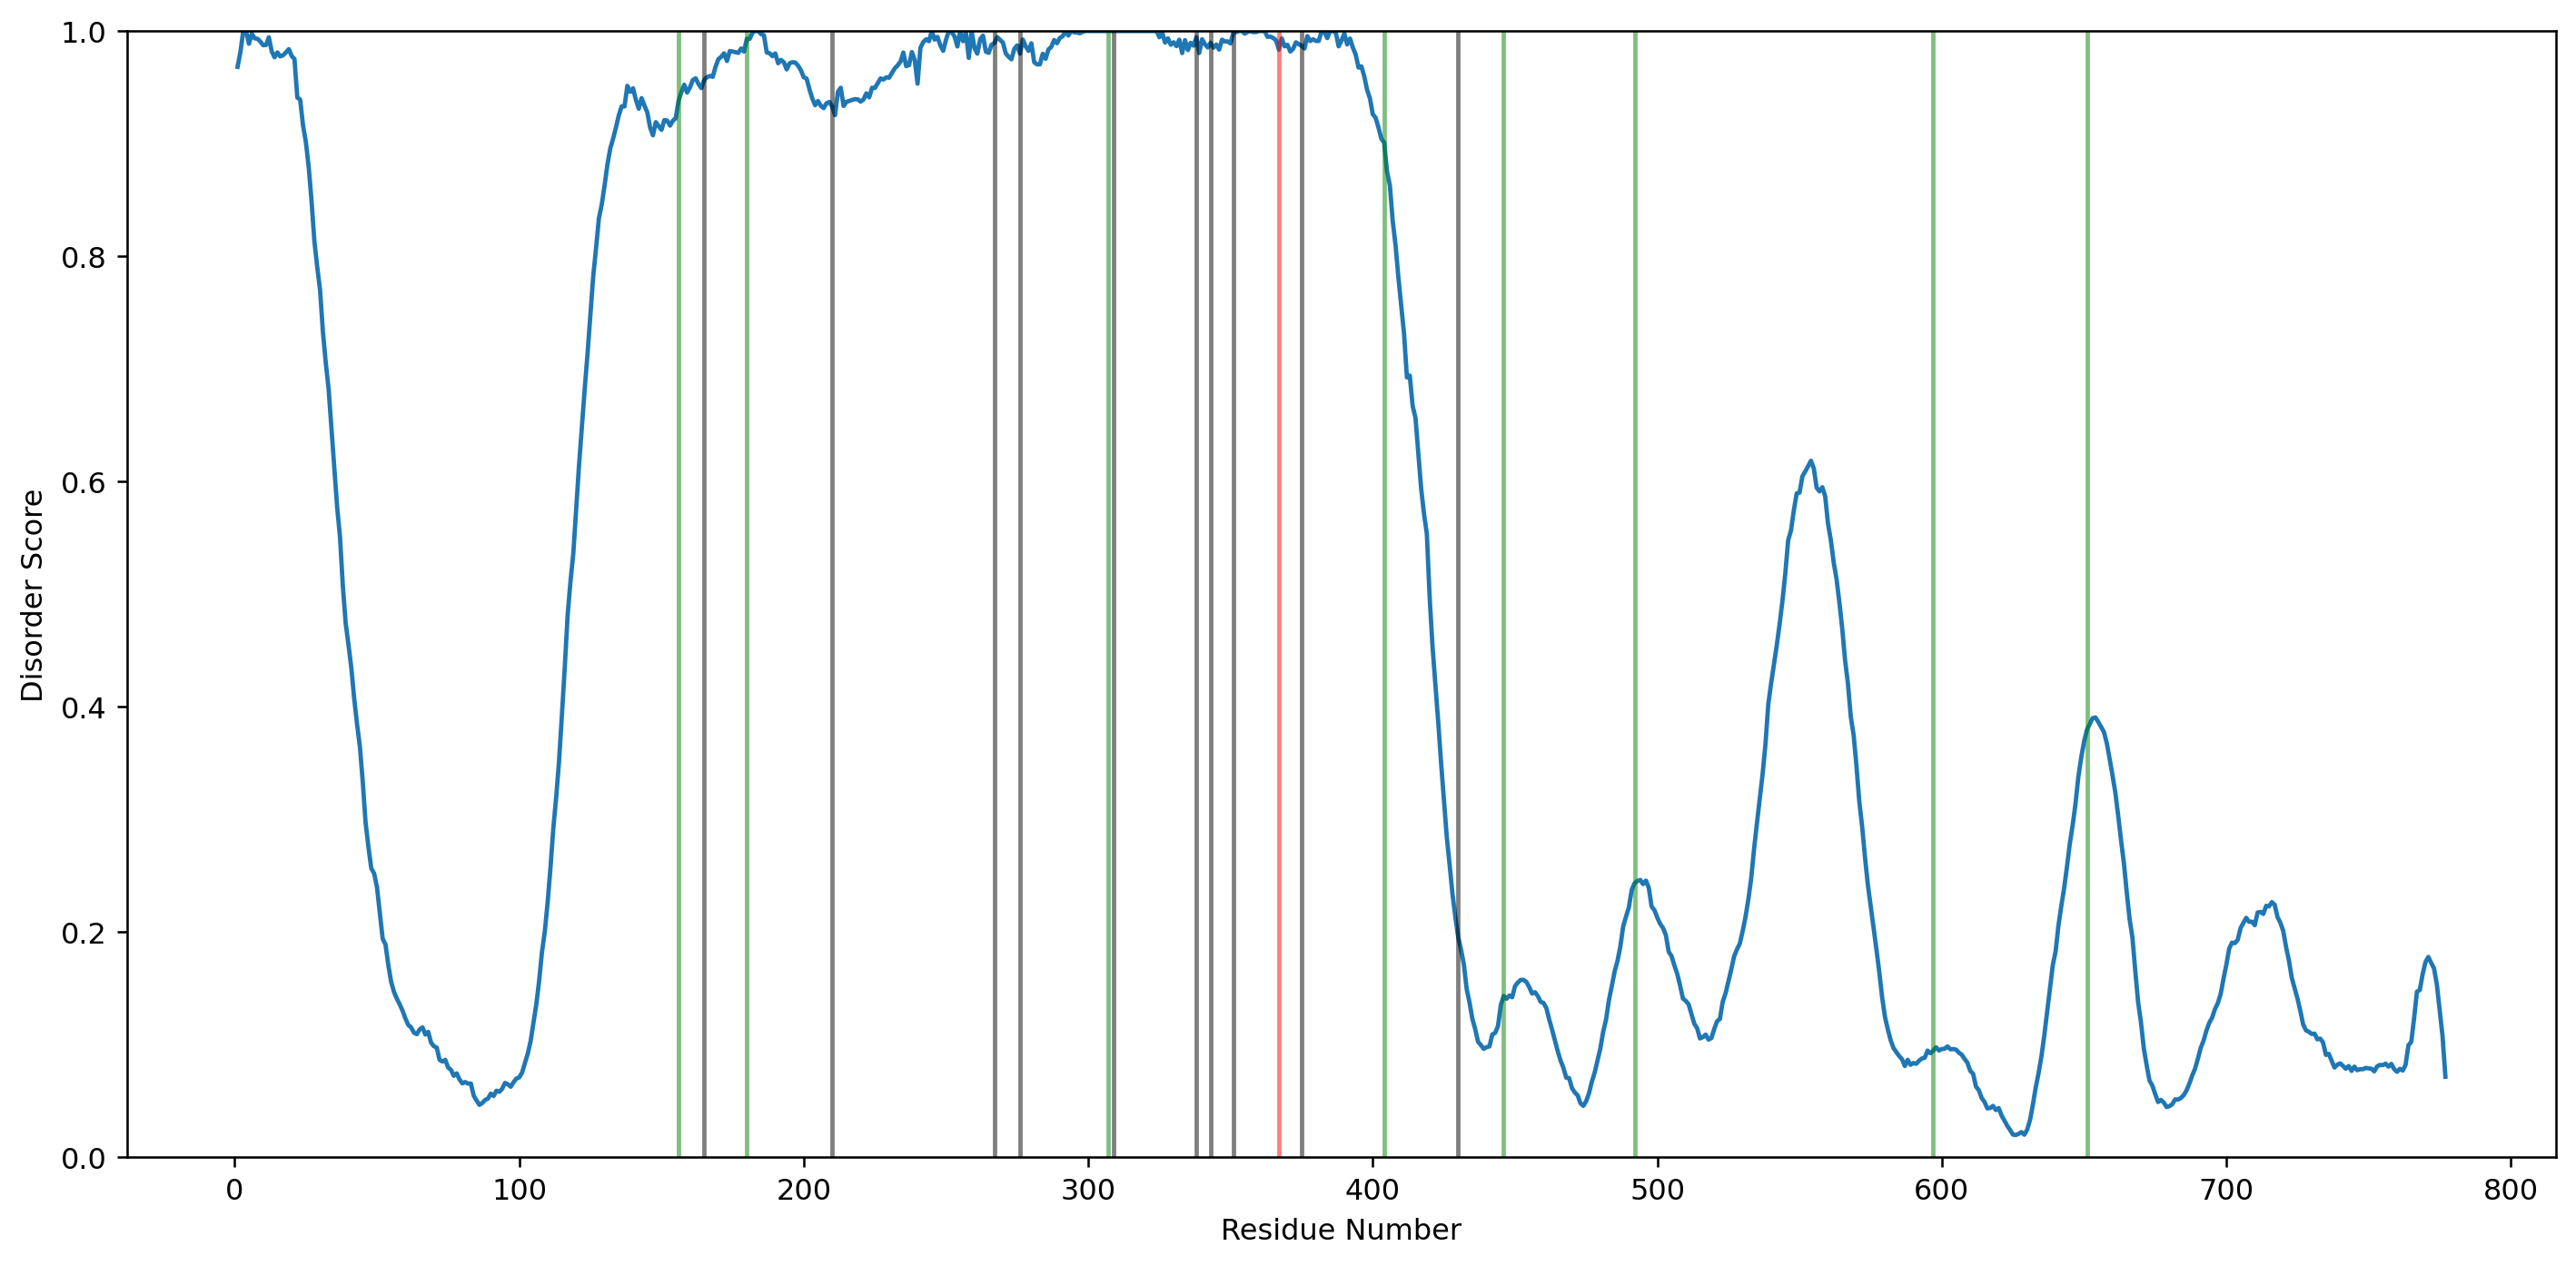

In [37]:
# display the locations
plt.figure(figsize=(15,7), dpi=230)
plt.plot(np.arange(1,1 + len(bard1_disorder)), bard1_disorder)
# plot the locations of the predicted phosphosites
for p_site in s_sites:
    # we need to add one back to get it in units of residue number
    plt.axvline(p_site + 1, color='r', alpha=0.5)

for p_site in tyro_sites:
    # we need to add one back to get it in units of residue number
    plt.axvline(p_site + 1, color='g', alpha=0.5)

for p_site in threo_sites:
    # we need to add one back to get it in units of residue number
    plt.axvline(p_site + 1, color='k', alpha=0.5)

plt.xlabel(f"Residue Number")
plt.ylabel(f"Disorder Score")
plt.ylim([0,1])

In IDRs Short Linear Motifs (SLiMs) are often important to carry out functions. We can find pattern matched motifs in sequences using sparrow. It is worth noting that these motifs are not always functional and sometimes they just match the motifs that have been found in Eukaryotes.

In [38]:
# we do not use the predictor module for this as we are just pattern matching
bard1_all_elms = BARD1_Protein.elms # Note this is a property again and does not take parameters

The result is a set of ELMs. They are their own special object that have a few nice functions and properties.

In [39]:
print(bard1_all_elms)

{ELM(regex='..(T)..[DE].', identifier='LIG_FHA_2', functional_site_name='FHA phosphopeptide ligands', description='Phosphothreonine motif binding a subset of FHA domains that have a preference for an acidic amino acid at the pT+3 position.', probability='0.008286441426', start=595, end=602, sequence='KYTEFDS'), ELM(regex='[VILPFYM].{1,3}L.L(S)', identifier='LIG_IRF7_LxLS_2', functional_site_name='IRF interaction and dimerisation motifs', description='A binding site for IRF-7 present in the protein itself, in various innate adaptor proteins, and in rotaviral NSP1 which triggers the innate immune responsive pathways.', probability='0.00048631337078', start=508, end=515, sequence='IVKLLLS'), ELM(regex='[EDSTY].{0,4}[VIPLA][TSDEKR][ILVA]', identifier='LIG_WD40_WDR5_VDV_2', functional_site_name='WDR5 WD40 repeat (blade 5,6)-binding ligand', description='Fungi-specific variant of the WDR5-binding motif that binds to a cleft between blades 5 and 6 of the WD40 repeat domain of WDR5, opposite o

We can loop over and print them out for each inidividual elm you can find a variety of info about them. You can use: .regex, .identifier, .functional_site_name, .description, .probability, .start, .end, .sequence

In [40]:
for elm in bard1_all_elms:
    print(elm)

ELM(regex='..(T)..[DE].', identifier='LIG_FHA_2', functional_site_name='FHA phosphopeptide ligands', description='Phosphothreonine motif binding a subset of FHA domains that have a preference for an acidic amino acid at the pT+3 position.', probability='0.008286441426', start=595, end=602, sequence='KYTEFDS')
ELM(regex='[VILPFYM].{1,3}L.L(S)', identifier='LIG_IRF7_LxLS_2', functional_site_name='IRF interaction and dimerisation motifs', description='A binding site for IRF-7 present in the protein itself, in various innate adaptor proteins, and in rotaviral NSP1 which triggers the innate immune responsive pathways.', probability='0.00048631337078', start=508, end=515, sequence='IVKLLLS')
ELM(regex='[EDSTY].{0,4}[VIPLA][TSDEKR][ILVA]', identifier='LIG_WD40_WDR5_VDV_2', functional_site_name='WDR5 WD40 repeat (blade 5,6)-binding ligand', description='Fungi-specific variant of the WDR5-binding motif that binds to a cleft between blades 5 and 6 of the WD40 repeat domain of WDR5, opposite of t

In [41]:
# print the last elms description
print(f"The last ELMs description: {elm.description}")

The last ELMs description: CK1 phosphorylation site


Lets pretend that we have an isoform of BARD1 that has the last 100ish residues chopped off. We could see the effects on its ELMs using sparrow.

In [42]:
# Lets generate the fake isoform
BARD1_fake_isoform = Protein(BARD1_Protein.sequence[0:700])

In [43]:
# Lets get the new versions elms 
fake_iso_elms = BARD1_fake_isoform.elms

In [44]:
# Lets see what has changed from doing this
elm_dif = bard1_all_elms.difference(fake_iso_elms)

In [45]:
print(f"ELMs that were changed: {elm_dif}")

ELMs that were changed: {ELM(regex='S..([ST])...', identifier='MOD_CK1_1', functional_site_name='Casein kinase 1 (CK1) Phosphorylation site', description='CK1 phosphorylation site', probability='0.017040740254', start=710, end=717, sequence='SDVTQTI'), ELM(regex='..(T)..[ILV].', identifier='LIG_FHA_1', functional_site_name='FHA phosphopeptide ligands', description='Phosphothreonine motif binding a subset of FHA domains that show a preference for a large aliphatic amino acid at the pT+3 position.', probability='0.008662242543', start=731, end=738, sequence='FCTQYII'), ELM(regex='R[^DE]{0,2}[^DEPG]([ST])(([FWYLMV].)|([^PRIKGN]P)|([^PRIKGN].{2,4}[VILMFWYP]))', identifier='LIG_14-3-3_CanoR_1', functional_site_name='14-3-3 binding phosphopeptide motif', description='Canonical Arg-containing phospho-motif mediating a strong interaction with 14-3-3 proteins.  ', probability='0.0044766733275', start=730, end=739, sequence='RFCTQYIIY'), ELM(regex='[^DE]((K[RK])|(RK))(([^DE][KR])|([KR][^DE]))(([

You can also do the symmetric difference and many others but this should have given you enough of a tutorial on sparrow to help you on your way to using it for bioinformatics.